In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("../Data/Hotels_Best_Discount.csv")
X = df[["Snapshot Date", "Checkin Date", "DayDiff", "WeekDay", "Hotel_Encoded_Name"]]
y = df["Discount Code"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

**KNN Hyperparameters Overview**

- n_neighbors – Defines the number of nearest neighbors used to classify a data point. A lower value makes the model more sensitive to noise, while a higher value smooths predictions but may lose finer details.

- weights – Determines how neighbors contribute to the classification.

    uniform: All neighbors have equal weight.

    distance: Closer neighbors have a higher influence.

- metric – Specifies the distance function used to determine the nearest neighbors. Common choices include:

    euclidean: Straight-line distance.

    manhattan: Sum of absolute differences (grid-like movement).

    minkowski: A generalized distance metric combining both.







In [ ]:
param_grid = {
    "n_neighbors": [3, 5, 7, 10, 15],  # default=5
    "weights": ["uniform", "distance"],  # default=uniform
    "metric": ["euclidean", "manhattan", "minkowski"]  # default=minkowski
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

# Extract top 5 and worst 5 models
top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]
worst_5_models = results_df.iloc[-5:][["mean_test_score", "params"]]

# Print top 5 models
print("\nTop 5 KNN Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

# Print worst 5 models
print("\nWorst 5 KNN Models (based on validation accuracy):")
for idx, row in worst_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

# Extract best parameters
best_knn_params = grid_search.best_params_
print("\nBest Hyperparameters Found:")
print(best_knn_params)



Top 5 KNN Models (based on validation accuracy):
Model 14: Accuracy=0.5938, Params={'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Model 12: Accuracy=0.5913, Params={'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Model 16: Accuracy=0.5866, Params={'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Model 18: Accuracy=0.5767, Params={'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Model 20: Accuracy=0.5630, Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

Worst 5 KNN Models (based on validation accuracy):
Model 5: Accuracy=0.4368, Params={'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Model 7: Accuracy=0.4239, Params={'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Model 27: Accuracy=0.4239, Params={'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
Model 9: Accuracy=0.4057, Params={'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Model 29:

In [10]:
param_grid = {
    "n_neighbors": [1, 2, 5, 6, 8],  # default=5
    "weights": ["distance"],  # default=uniform
    "metric": ["manhattan"]  # default=minkowski
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)
top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]

print("\nTop 5 KNN Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

best_knn = grid_search.best_estimator_
best_knn_params = grid_search.best_params_
print("\nBest Hyperparameters Found:")
print(best_knn_params)


Top 5 KNN Models (based on validation accuracy):
Model 1: Accuracy=0.6437, Params={'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}
Model 2: Accuracy=0.6431, Params={'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Model 3: Accuracy=0.5938, Params={'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Model 4: Accuracy=0.5927, Params={'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Model 5: Accuracy=0.5834, Params={'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

Best Hyperparameters Found:
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}


In [11]:
y_pred_proba = best_knn.predict_proba(X_test)
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix) 
fn = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  
precision = np.diag(conf_matrix) / (np.diag(conf_matrix) + fp)
recall = np.diag(conf_matrix) / (np.diag(conf_matrix) + fn)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")


print(f"KNN Test Accuracy: {test_accuracy:.4f}")
print(f"KNN ROC AUC Score: {roc_auc:.4f}")
print("\nFalse Positives (FP) per class:")
print(fp)
print("\nFalse Negatives (FN) per class:")
print(fn)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Test Accuracy: 0.7146
KNN ROC AUC Score: 0.8066

False Positives (FP) per class:
[1511 1934 1661 1019]

False Negatives (FN) per class:
[1584 1889 1615 1037]

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.72      0.72      5609
           2       0.72      0.72      0.72      6830
           3       0.71      0.72      0.72      5773
           4       0.68      0.68      0.68      3248

    accuracy                           0.71     21460
   macro avg       0.71      0.71      0.71     21460
weighted avg       0.71      0.71      0.71     21460



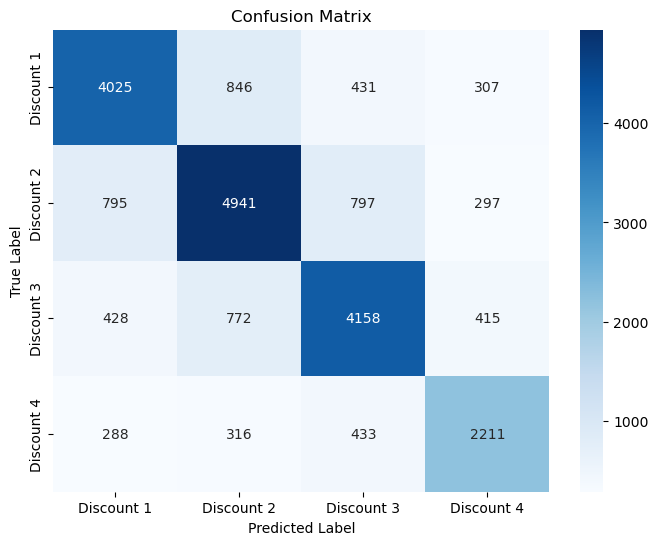

In [12]:
classes = [f"Discount {i}" for i in range(1, len(conf_matrix) + 1)]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

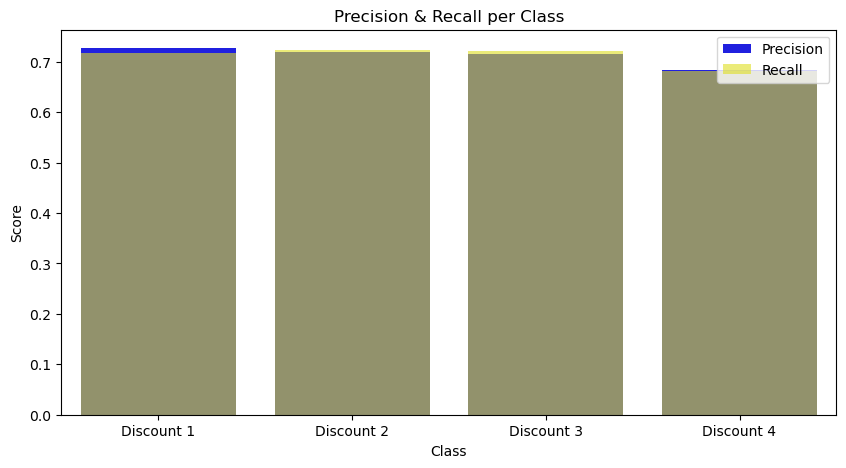

In [13]:
df_metrics = pd.DataFrame({"Class": classes, "Precision": precision, "Recall": recall})

plt.figure(figsize=(10, 5))
sns.barplot(x="Class", y="Precision", data=df_metrics, color="blue", label="Precision")
sns.barplot(x="Class", y="Recall", data=df_metrics, color="yellow", alpha=0.6, label="Recall")
plt.ylabel("Score")
plt.title("Precision & Recall per Class")
plt.legend()
plt.show()

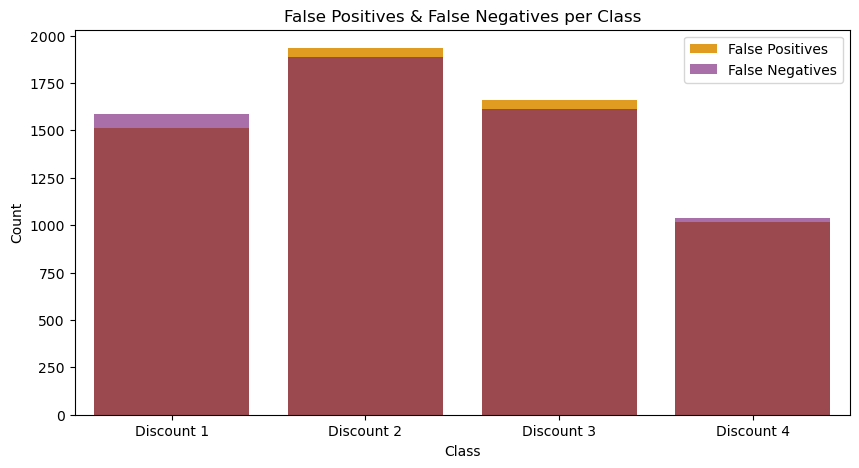

In [14]:
df_fp_fn = pd.DataFrame({"Class": classes, "False Positives": fp, "False Negatives": fn})

plt.figure(figsize=(10, 5))
sns.barplot(x="Class", y="False Positives", data=df_fp_fn, color="orange", label="False Positives")
sns.barplot(x="Class", y="False Negatives", data=df_fp_fn, color="purple", alpha=0.6, label="False Negatives")
plt.ylabel("Count")
plt.title("False Positives & False Negatives per Class")
plt.legend()
plt.show()

### **Conclusion: K-Nearest Neighbors Performance**
KNN performed **moderately well**, but struggled compared to other models.

- **Best Accuracy:** ~59.4% (Manhattan distance, weighted by distance).
- **Performance Drop:** Euclidean and Minkowski metrics is more affected by feature scaling issues.
- **n_neighbors:** The best choise was 1 maybe because class 4

We want try again with normalized data.



In [ ]:
l2_normalizer = Normalizer(norm="l2")  # Default is 'l2' norm
X_train_l2 = l2_normalizer.fit_transform(X_train)
X_test_l2 = l2_normalizer.transform(X_test)

In [20]:
param_grid = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15],  # default=5
    "weights": ["uniform", "distance"],  # default=uniform
    "metric": ["euclidean", "manhattan", "minkowski"]  # default=minkowski
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_l2, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

# Extract top 5 and worst 5 models
top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]
worst_5_models = results_df.iloc[-5:][["mean_test_score", "params"]]

# Print top 5 models
print("\nTop 5 KNN Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

# Print worst 5 models
print("\nWorst 5 KNN Models (based on validation accuracy):")
for idx, row in worst_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

# Extract best parameters
best_knn_params = grid_search.best_params_
print("\nBest Hyperparameters Found:")
print(best_knn_params)



Top 5 KNN Models (based on validation accuracy):
Model 33: Accuracy=0.4033, Params={'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Model 31: Accuracy=0.4012, Params={'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Model 35: Accuracy=0.3970, Params={'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}
Model 37: Accuracy=0.3955, Params={'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Model 29: Accuracy=0.3940, Params={'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

Worst 5 KNN Models (based on validation accuracy):
Model 4: Accuracy=0.3209, Params={'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Model 2: Accuracy=0.3209, Params={'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
Model 50: Accuracy=0.3209, Params={'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
Model 49: Accuracy=0.3209, Params={'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
Model 1: Accura

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15],  # default=5
    "weights": ["uniform", "distance"],  # default=uniform
    "metric": ["euclidean", "manhattan", "minkowski"]  # default=minkowski
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

# Extract top 5 and worst 5 models
top_5_models = results_df.iloc[:5][["mean_test_score", "params"]]
worst_5_models = results_df.iloc[-5:][["mean_test_score", "params"]]

# Print top 5 models
print("\nTop 5 KNN Models (based on validation accuracy):")
for idx, row in top_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

# Print worst 5 models
print("\nWorst 5 KNN Models (based on validation accuracy):")
for idx, row in worst_5_models.iterrows():
    print(f"Model {idx+1}: Accuracy={row['mean_test_score']:.4f}, Params={row['params']}")

# Extract best parameters
best_knn_params = grid_search.best_params_
print("\nBest Hyperparameters Found:")
print(best_knn_params)



Top 5 KNN Models (based on validation accuracy):
Model 31: Accuracy=0.5226, Params={'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Model 29: Accuracy=0.5191, Params={'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Model 33: Accuracy=0.5180, Params={'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Model 35: Accuracy=0.5143, Params={'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}
Model 37: Accuracy=0.5141, Params={'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

Worst 5 KNN Models (based on validation accuracy):
Model 71: Accuracy=0.4650, Params={'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}
Model 22: Accuracy=0.4644, Params={'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
Model 70: Accuracy=0.4644, Params={'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}
Model 24: Accuracy=0.4620, Params={'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Model 72:

Normalization is not improving our results, possibly because it brings class 4 points closer to the other classes, further reducing the representation of the less frequent classes. This may lead to even fewer instances where the model selects class #4